In [100]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

## Step 1: Reading and Understanding the Data

Let us first import NumPy and Pandas and read the dataset.

In [101]:
# Import the numpy and pandas package

import numpy as np
import pandas as pd

In [102]:

# Read the given CSV file, and display a few records in the dataframe

bike_df = pd.read_csv("/Users/dranzer/Documents/upGrad/IIIT-B-EPGP/Course_Work/C2-ML-1/M2-LR-Assignment/day.csv")

bike_df.head()


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [103]:
# Check the number of rows and columns in the dataframe

bike_df.shape

(730, 16)

In [104]:
# Check the column-wise info of the dataframe


bike_df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


##### All of the columns have non-null values. So, we can proceed further.

In [105]:
# Check the summary for the numeric columns 

bike_df.describe()



,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## Step 2: Data Cleaning

- 1. In the given data set, the column "instant" is of no use because it just specifies the Serial numbers for a given row of data. So, we can drop this column.


- 2. Also, the columns "casual" and "registered" combine to form the target variable "cnt". As these values will not be available at the time of making predictions, we must drop them.


- 3. Also, the column "dteday" can also be dropped because the data inside this column is already contained in the columns "yr" and "mnth". So, we can drop this column as well from the data frame.




In [106]:
# Dropping the columns "instant", "dteday", "casual", "registered".

bike_df.drop(["instant","dteday","casual","registered"], axis = 1, inplace = True)


In [107]:
# Verifying whether the columns are dropped or not


bike_df.head()


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


### <font color = red > Converting a few columns containing Numeric variables to their respective Categorical values. </font>

- 1. The columns "season","mnth","weekday", and "weathersit" are given in terms of numeric variables. Now, we need to convert the values in these columns to categorical variables because none of the values in these columns are ranked more than the others, i.e., the season 1 does not have a higher priority over season 4, and mnth 1 does not have higher priority over mnth 12.
- 2. Moreover, the dummy variables can be created only on the object data type. So, we need to convert the values in these columns to their respective categorical variables.
 

#### <font color = green > 1. Let us start with "season" column. </font>

In [108]:
# Converting the values in the "season" column from Numeric to Categorical variables.

# Here we convert #1 - Spring, #2 - Summer, #3 - Fall, #4 - Winter.

seasons_dictionary = {1: 'Spring', 2: 'Summer', 3:'Fall', 4:'Winter'}

def season_mapper(season):
    return seasons_dictionary[season]

bike_df["season"] = bike_df["season"].apply(season_mapper)


In [109]:
# Verifying whether the values in the column have changed or not

bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [110]:
# Checking the value count of each season

bike_df["season"].value_counts()



Fall      188
Summer    184
Spring    180
Winter    178
Name: season, dtype: int64

#### <font color = green > 2. Let us convert "mnth" column from numeric to categorical. </font>

In [111]:
# Converting the values in the "month" column from Numeric to Categorical variables.

# Here we convert #1 - Jan, #2 - Feb, ... , #12 - Dec.

import calendar

bike_df['mnth'] = bike_df['mnth'].apply(lambda x: calendar.month_abbr[x])


In [112]:
# Verifying whether the values in the column have changed or not

bike_df.head()


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,Jan,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,Jan,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [113]:
# Checking the value count of each month

bike_df['mnth'].value_counts(ascending = True)


Feb    56
Nov    60
Sep    60
Jun    60
Apr    60
Oct    62
May    62
Jan    62
Aug    62
Mar    62
Jul    62
Dec    62
Name: mnth, dtype: int64

#### <font color = green > 3. Let us convert "weekday" column from numeric to categorical. </font>

In [114]:
# Converting the values in the "weekday" column from Numeric to Categorical variables.

# Here we convert #0 - Sunday, #1 - Monday, ... , #6 - Saturday.

weekday_dictionary={ 0:'Sunday', 1:'Monday', 2:'Tuesday', 3:'Wednesday', 4:'Thursday', 5:'Friday', 6:'Saturday'}

def day_mapper(day):
    return weekday_dictionary[day]

bike_df['weekday'] = bike_df['weekday'].apply(day_mapper)


In [115]:
# Verifying whether the values in the column have changed or not

bike_df.head()


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,Jan,0,Saturday,0,2,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,0,Sunday,0,2,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,0,Monday,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,0,Tuesday,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,Jan,0,Wednesday,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [116]:
# Checking the value count of each weekday

bike_df['weekday'].value_counts()

Saturday     105
Sunday       105
Monday       105
Friday       104
Tuesday      104
Thursday     104
Wednesday    103
Name: weekday, dtype: int64

#### <font color = green > 4. Let us convert "weathersit" column from numeric to categorical. </font>

In [117]:
# Converting the values in the "weathersit" column from Numeric to Categorical variables.

# Here we convert 1-Clear, 2-Cloudy, 3-Light Snow Rain, 4-Heavy Snow Rain.

weather_dictionary = {1: 'Clear', 2: 'Cloudy', 3:'Light Snow Rain', 4:'Heavy Snow Rain'}

def weather_mapper(weather):
    return weather_dictionary[weather]

bike_df["weathersit"] = bike_df["weathersit"].apply(weather_mapper)



In [118]:
# Verifying whether the values in the column have changed or not

bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,Jan,0,Saturday,0,Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,0,Sunday,0,Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,0,Monday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,0,Tuesday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,Jan,0,Wednesday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [119]:
# Checking the value count of each weathersit

bike_df['weathersit'].value_counts()


Clear              463
Cloudy             246
Light Snow Rain     21
Name: weathersit, dtype: int64

##### Now that we are done with the data cleaning, let us move on to the data visualization, and draw some insights.

## Step 3: Visualising the Data

Let's now spend some time on - **visualising the data**.
- If there is some obvious multicollinearity going on, this is the first place to catch it.
- Here we can also identify whether some predictors have a strong association with the outcome variable.

We'll visualise our data using `matplotlib` and `seaborn`.

In [120]:
# checking the bike_df data frame

bike_df

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,Jan,0,Saturday,0,Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,0,Sunday,0,Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,0,Monday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,0,Tuesday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,Jan,0,Wednesday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...,...
725,Spring,1,Dec,0,Thursday,1,Cloudy,10.420847,11.33210,65.2917,23.458911,2114
726,Spring,1,Dec,0,Friday,1,Cloudy,10.386653,12.75230,59.0000,10.416557,3095
727,Spring,1,Dec,0,Saturday,0,Cloudy,10.386653,12.12000,75.2917,8.333661,1341
728,Spring,1,Dec,0,Sunday,0,Clear,10.489153,11.58500,48.3333,23.500518,1796


In [121]:
# Let us import matplotlib and seaborn

import matplotlib.pyplot as plt
import seaborn as sns


#### Visualising Numeric Variables


Let's make a pairplot of all the numeric variables

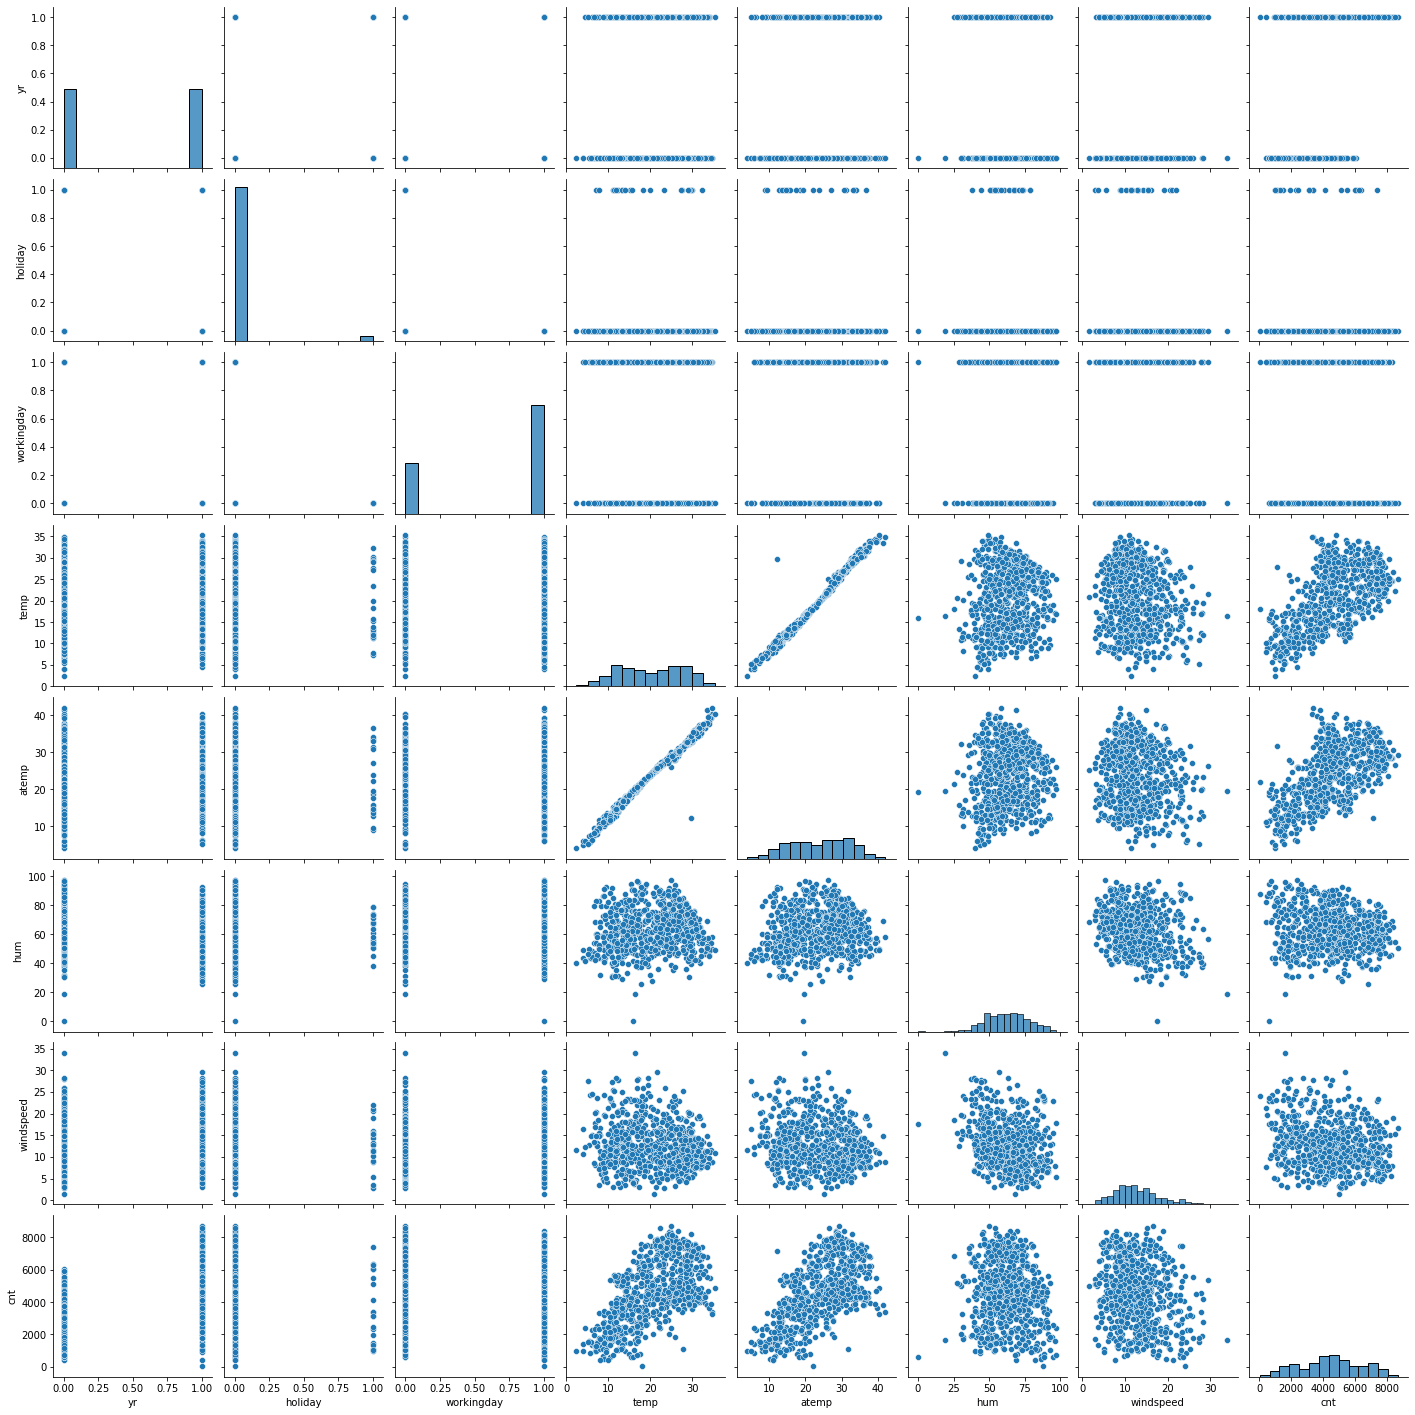

In [122]:
# plotting a pair-plot using seaborn

sns.pairplot(bike_df)

plt.show()

### <font color = green > Insights: </font>


- 1. The columns "temp" and "atemp" seem to be highly correlated. So, we can use any one of them in the model building process.


- 2. The columns above "temp" and "atemp" seem to be having a strong association with the target variable "cnt".


- 3. Also, the columns above "temp" and "atemp" seem to be having a positive correlation with the variable "hum".

#### Visualising Categorical Variables

As you might have noticed, there are a few categorical variables as well. Let's make a boxplot for some of these variables against the target variable.

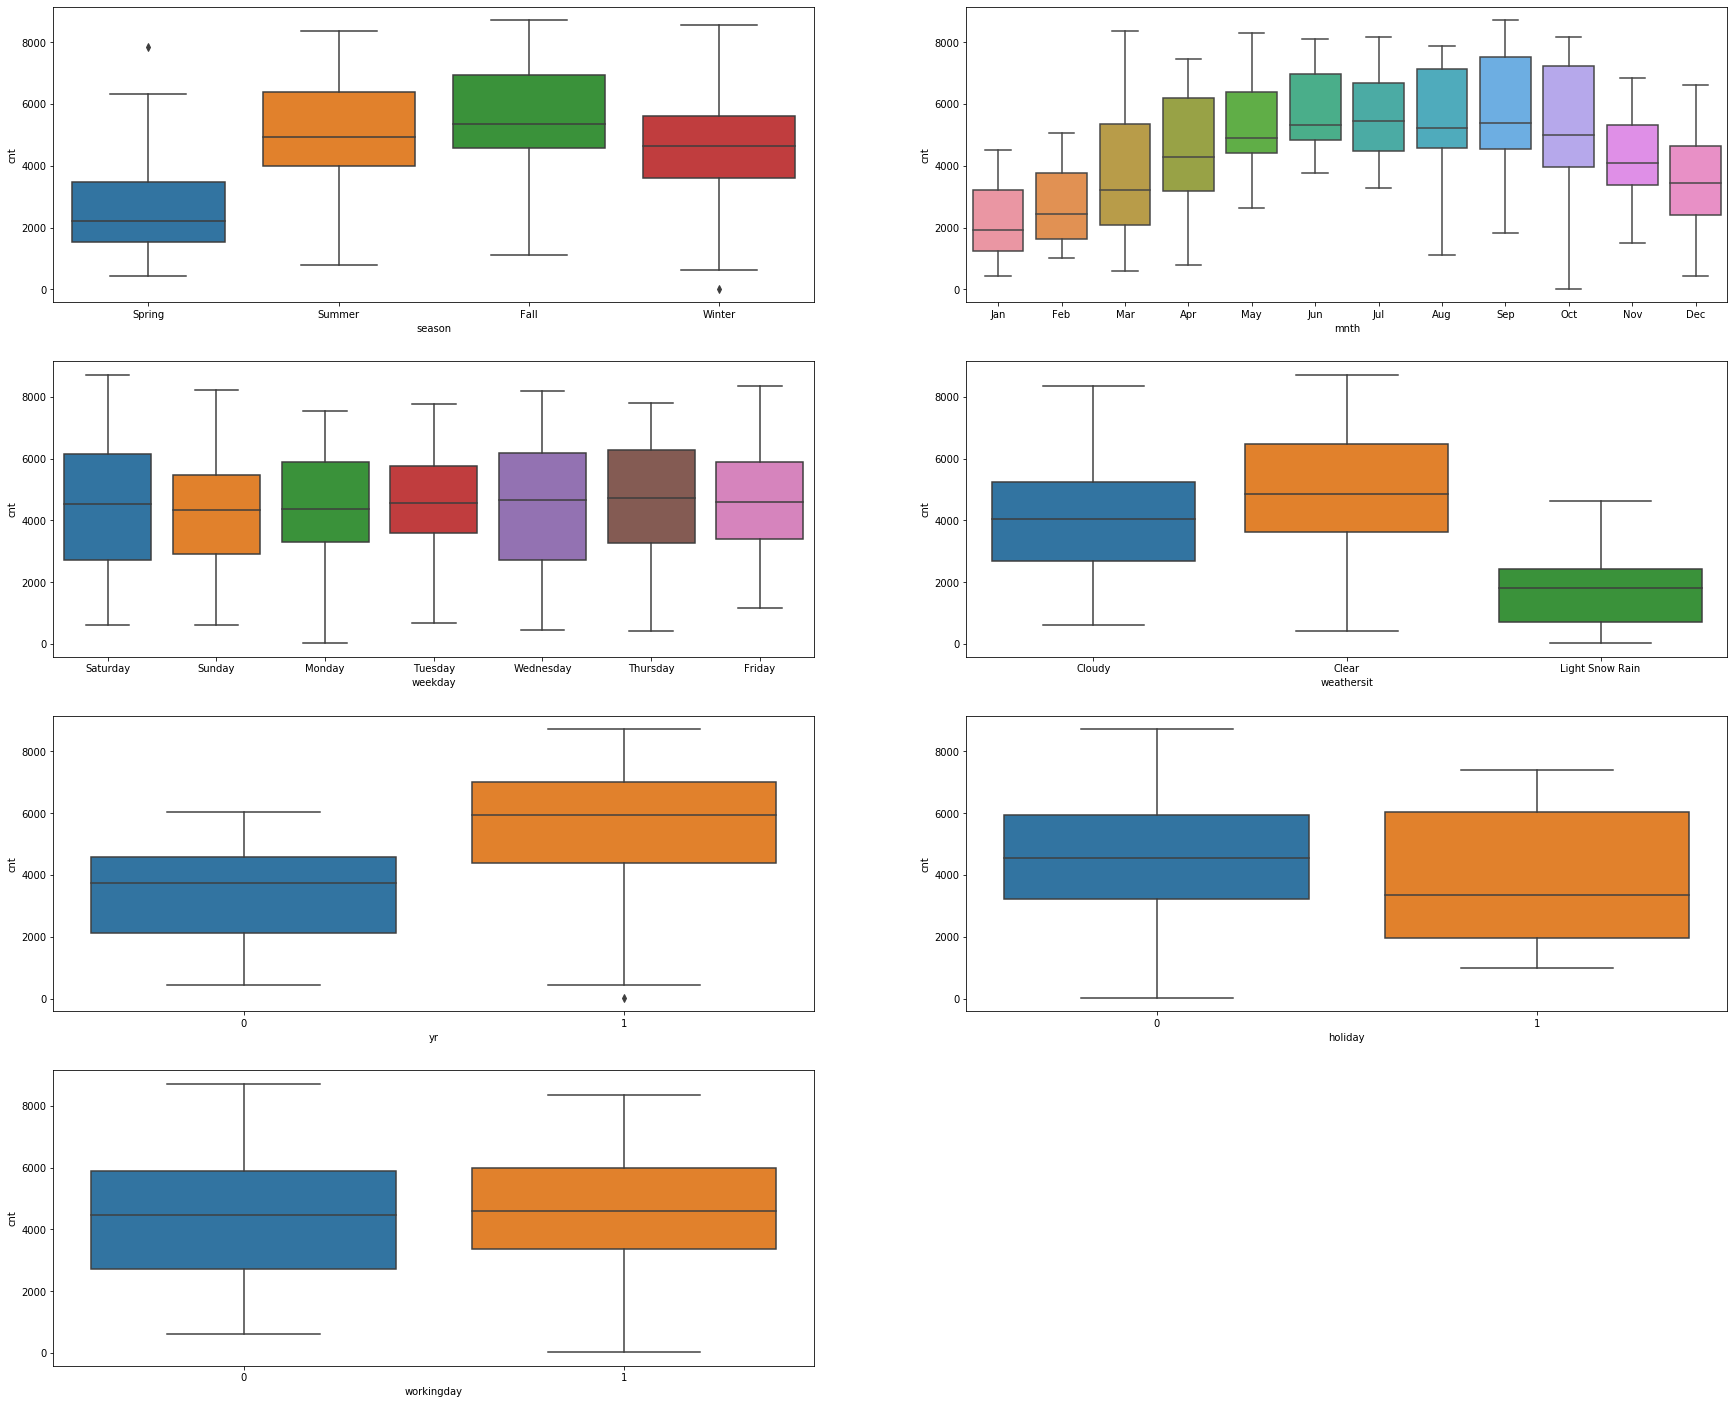

In [123]:
# plotting box plots for all the categorical variables against the target variable.

plt.figure(figsize=(30,25))
plt.subplot(4,2,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike_df)
plt.subplot(4,2,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike_df)
plt.subplot(4,2,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike_df)
plt.subplot(4,2,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike_df)
plt.subplot(4,2,5)
sns.boxplot(x = 'yr', y = 'cnt', data = bike_df)
plt.subplot(4,2,6)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike_df)
plt.subplot(4,2,7)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike_df)
plt.show()


### <font color = green > Insights: </font>


- 1. In the seasons boxplot, "Fall" seems to have the highest median count ("cnt") value, and "spring" has the lowest median count ("cnt") value.


- 2. In the months boxplot, "Jan" seems to have the lowest median count ("cnt") value, where as "Jul" has the highest median count ("cnt") value.


- 3. In the weekday boxplot, the IQR (Inter Quartile Range) of "Wednesday" and "Saturday" seems to be the highest.


- 4. In the weathersit boxplot, "Light Snow Rain" weather situation seems to have the lowest median count ("cnt") value, where as "Clear" weather situation has the highest median count ("cnt") value. i.e., the people prefer to take or rent a bike on a clear day as compared to a snowy or a cloudy day.

## Step 4: Data Preparation

- Our dataset has many columns with categorical values.

- But in order to fit a regression line, we would need numerical values and not strings . Hence, we need to convert them to integer values.

- We need to convert all the levels under each categorical variable into integer variables. 

- For this, we will use something called `dummy variables`.

### Dummy Variables

#### <font color = green > 1. Creating dummy variables for the "season" column. </font>

In [124]:
# Get the dummy variables for the feature 'season' and store it in a new variable - 'season_df'

season_df = pd.get_dummies(bike_df['season'])


In [125]:
# Check what the dataset 'season_df' looks like

season_df.head()


,Fall,Spring,Summer,Winter
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0


In [126]:
season_df.head(50)

,Fall,Spring,Summer,Winter
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0
5,0,1,0,0
6,0,1,0,0
7,0,1,0,0
8,0,1,0,0
9,0,1,0,0


Now, you don't need four columns. You can drop the `Fall` column, as the type of season can be identified with just three columns where — 
- `100` will correspond to `Spring`
- `010` will correspond to `Summer`
- `001` will correspond to `Winter`
- `000` will correspond to `Fall`

In [127]:
# Let's drop the first column from "season_df" data frame using 'drop_first = True'

season_df = pd.get_dummies(bike_df['season'], drop_first = True)


In [128]:
# Check what the dataset 'season_df' looks like

season_df.head()


,Spring,Summer,Winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [129]:
# Add the results to the original bike_df dataframe

bike_df = pd.concat([bike_df, season_df], axis = 1)



In [130]:
# let's check the head of the data frame

bike_df.head()


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,Spring,Summer,Winter
0,Spring,0,Jan,0,Saturday,0,Cloudy,14.110847,18.18125,80.5833,10.749882,985,1,0,0
1,Spring,0,Jan,0,Sunday,0,Cloudy,14.902598,17.68695,69.6087,16.652113,801,1,0,0
2,Spring,0,Jan,0,Monday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349,1,0,0
3,Spring,0,Jan,0,Tuesday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562,1,0,0
4,Spring,0,Jan,0,Wednesday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600,1,0,0


In [131]:
# Drop 'season' column as we have created the dummies for it

bike_df.drop(['season'], axis = 1, inplace = True)


In [132]:
# Check whether the column 'season' is deleted or not.

bike_df.head()


,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,Spring,Summer,Winter
0,0,Jan,0,Saturday,0,Cloudy,14.110847,18.18125,80.5833,10.749882,985,1,0,0
1,0,Jan,0,Sunday,0,Cloudy,14.902598,17.68695,69.6087,16.652113,801,1,0,0
2,0,Jan,0,Monday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349,1,0,0
3,0,Jan,0,Tuesday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562,1,0,0
4,0,Jan,0,Wednesday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600,1,0,0


##### As you can see, the column "season" has been deleted.

#### <font color = green > 2. Creating dummy variables for the "mnth" column. </font>

In [133]:
# Get the dummy variables for the column 'mnth' and store it in a new variable - 'month_df'

month_df = pd.get_dummies(bike_df['mnth'])



In [134]:
# Check what the dataset 'month_df' looks like

month_df.head()



,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0


##### Now, here also you don't need 12 columns. You can drop the `Apr` column, as the type of month can be identified with just 11 columns.

In [135]:
# Let's drop the first column from "month_df" data frame using 'drop_first = True'

month_df = pd.get_dummies(bike_df['mnth'], drop_first = True)


In [136]:
# Check whether the changes have applied or not.

month_df.head()



,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [137]:
# Add the results to the original bike_df dataframe

bike_df = pd.concat([bike_df, month_df], axis = 1)


In [138]:
# let's check the head of the data frame

bike_df.head()



,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,Jan,0,Saturday,0,Cloudy,14.110847,18.18125,80.5833,10.749882,...,0,0,1,0,0,0,0,0,0,0
1,0,Jan,0,Sunday,0,Cloudy,14.902598,17.68695,69.6087,16.652113,...,0,0,1,0,0,0,0,0,0,0
2,0,Jan,0,Monday,1,Clear,8.050924,9.47025,43.7273,16.636703,...,0,0,1,0,0,0,0,0,0,0
3,0,Jan,0,Tuesday,1,Clear,8.200000,10.60610,59.0435,10.739832,...,0,0,1,0,0,0,0,0,0,0
4,0,Jan,0,Wednesday,1,Clear,9.305237,11.46350,43.6957,12.522300,...,0,0,1,0,0,0,0,0,0,0


In [139]:
# Drop 'mnth' column as we have created the dummies for it

bike_df.drop(['mnth'], axis = 1, inplace = True)



In [140]:
# Check whether the column 'mnth' is deleted or not.

bike_df.head()


,yr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,Saturday,0,Cloudy,14.110847,18.18125,80.5833,10.749882,985,...,0,0,1,0,0,0,0,0,0,0
1,0,0,Sunday,0,Cloudy,14.902598,17.68695,69.6087,16.652113,801,...,0,0,1,0,0,0,0,0,0,0
2,0,0,Monday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349,...,0,0,1,0,0,0,0,0,0,0
3,0,0,Tuesday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562,...,0,0,1,0,0,0,0,0,0,0
4,0,0,Wednesday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600,...,0,0,1,0,0,0,0,0,0,0


##### As you can see, the column "mnth" has been deleted.

#### <font color = green > 3. Creating dummy variables for the "weekday" column. </font>

In [141]:
# Get the dummy variables for the column 'weekday' and store it in a new variable - 'weekday_df'

weekday_df = pd.get_dummies(bike_df['weekday'])



In [142]:
# Check what the dataset 'weekday_df' looks like

weekday_df.head()



,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,0,1,0,0,0,0
1,0,0,0,1,0,0,0
2,0,1,0,0,0,0,0
3,0,0,0,0,0,1,0
4,0,0,0,0,0,0,1


##### Now, here also you don't need 7 columns. You can drop the `Friday` column, as the type of day can be identified with just 6 columns.

In [143]:
# Let's drop the first column from "weekday_df" data frame using 'drop_first = True'

weekday_df = pd.get_dummies(bike_df['weekday'], drop_first = True)


In [144]:
# Check whether the changes have applied or not.

weekday_df.head()




,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,1,0,0,0,0,0
3,0,0,0,0,1,0
4,0,0,0,0,0,1


In [145]:
# Add the results to the original bike_df dataframe

bike_df = pd.concat([bike_df, weekday_df], axis = 1)



In [146]:
# let's check the head of the data frame

bike_df.head()


,yr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,...,May,Nov,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,0,Saturday,0,Cloudy,14.110847,18.18125,80.5833,10.749882,985,...,0,0,0,0,0,1,0,0,0,0
1,0,0,Sunday,0,Cloudy,14.902598,17.68695,69.6087,16.652113,801,...,0,0,0,0,0,0,1,0,0,0
2,0,0,Monday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349,...,0,0,0,0,1,0,0,0,0,0
3,0,0,Tuesday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562,...,0,0,0,0,0,0,0,0,1,0
4,0,0,Wednesday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600,...,0,0,0,0,0,0,0,0,0,1


In [147]:
# Drop 'weekday' column as we have created the dummies for it

bike_df.drop(['weekday'], axis = 1, inplace = True)


In [148]:
# Check whether the column 'weekday' is deleted or not.

bike_df.head()


,yr,holiday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,Spring,...,May,Nov,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,0,0,Cloudy,14.110847,18.18125,80.5833,10.749882,985,1,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,Cloudy,14.902598,17.68695,69.6087,16.652113,801,1,...,0,0,0,0,0,0,1,0,0,0
2,0,0,1,Clear,8.050924,9.47025,43.7273,16.636703,1349,1,...,0,0,0,0,1,0,0,0,0,0
3,0,0,1,Clear,8.200000,10.60610,59.0435,10.739832,1562,1,...,0,0,0,0,0,0,0,0,1,0
4,0,0,1,Clear,9.305237,11.46350,43.6957,12.522300,1600,1,...,0,0,0,0,0,0,0,0,0,1


##### As you can see, the column "weekday" has been deleted.

#### <font color = green > 4. Creating dummy variables for the "weathersit" column. </font>

In [149]:
# Get the dummy variables for the column 'weathersit' and store it in a new variable - 'weather_df'

weather_df = pd.get_dummies(bike_df['weathersit'])


In [150]:
#check the head of the data frame weather_df

weather_df.head()


,Clear,Cloudy,Light Snow Rain
0,0,1,0
1,0,1,0
2,1,0,0
3,1,0,0
4,1,0,0


Now, you don't need three columns. You can drop the `Clear` column, as the type of "weather" can be identified with just the last two columns where — 
- `00` will correspond to `Clear`
- `10` will correspond to `Cloudy`
- `01` will correspond to `Light Snow Rain`

In [151]:
# Let's drop the first column from "weather_df" data frame using 'drop_first = True'

weather_df = pd.get_dummies(bike_df['weathersit'], drop_first = True)


In [152]:
# Check whether the changes have applied or not.

weather_df.head()



,Cloudy,Light Snow Rain
0,1,0
1,1,0
2,0,0
3,0,0
4,0,0


In [153]:
# Add the results to the original bike_df dataframe

bike_df = pd.concat([bike_df, weather_df], axis = 1)


In [154]:
# let's check the head of the data frame

bike_df.head()


,yr,holiday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,Spring,...,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Cloudy,Light Snow Rain
0,0,0,0,Cloudy,14.110847,18.18125,80.5833,10.749882,985,1,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,Cloudy,14.902598,17.68695,69.6087,16.652113,801,1,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,Clear,8.050924,9.47025,43.7273,16.636703,1349,1,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,Clear,8.200000,10.60610,59.0435,10.739832,1562,1,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,Clear,9.305237,11.46350,43.6957,12.522300,1600,1,...,0,0,0,0,0,0,0,1,0,0


In [155]:
# Drop 'weathersit' column as we have created the dummies for it

bike_df.drop(['weathersit'], axis = 1, inplace = True)


In [156]:
# Check whether the column 'weathersit' is deleted or not.

bike_df.head()


,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,...,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Cloudy,Light Snow Rain
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,1,0,0


##### As you can see, the column "weathersit" has been deleted.


### <font color = red > Plotting a heat map for the data frame to identify elements with high correlation so as to eliminate multicollinearity. </font>


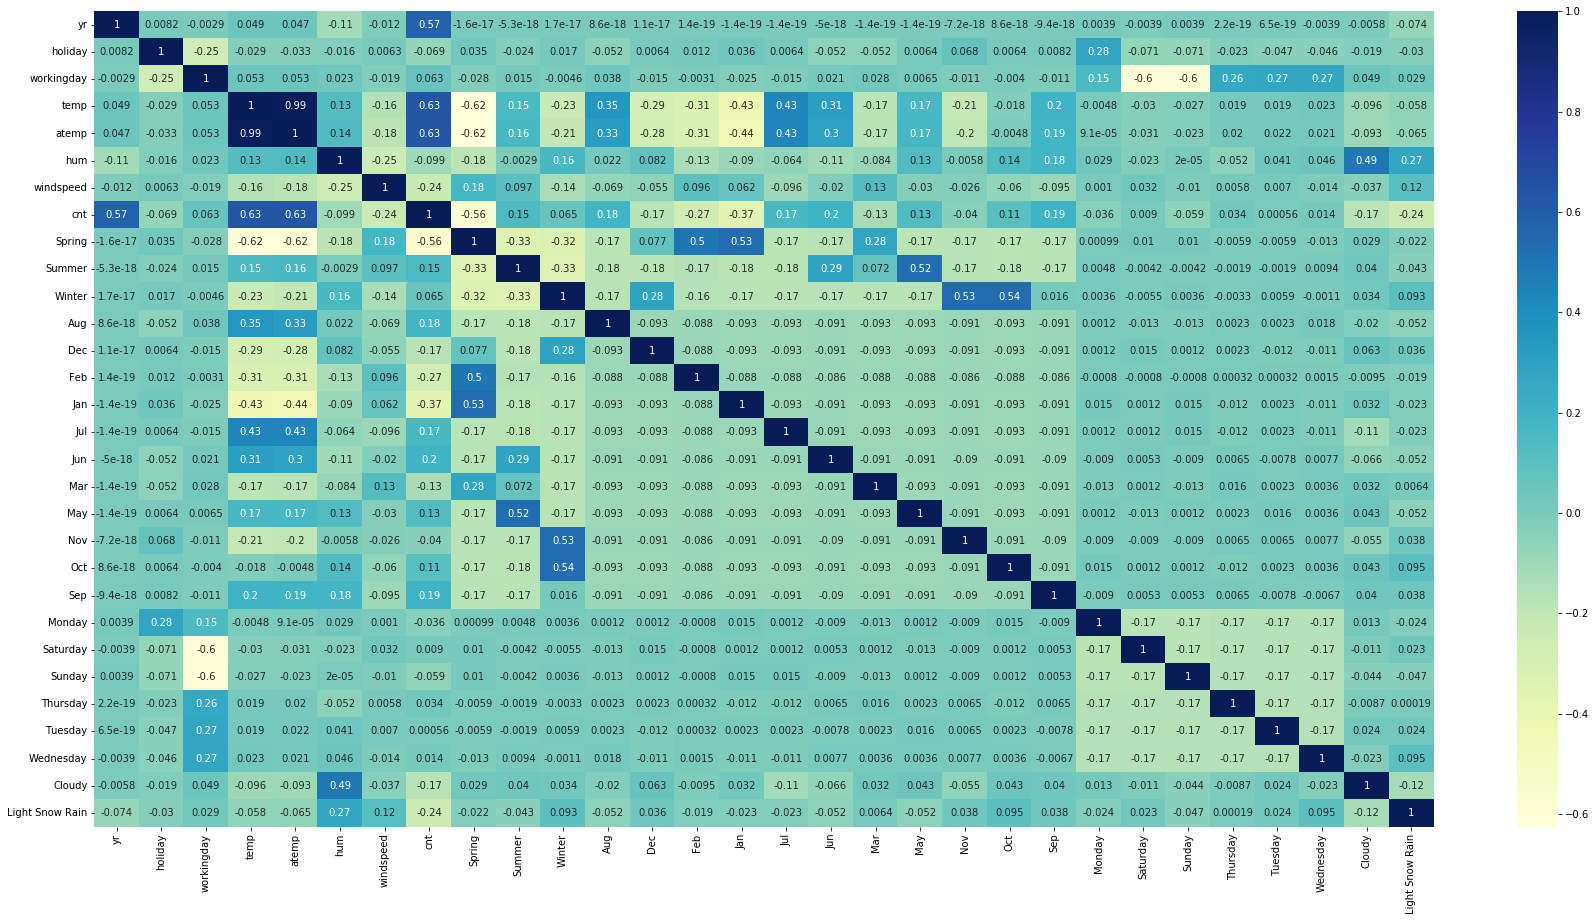

In [157]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (30, 15))
sns.heatmap(bike_df.corr(), annot = True, cmap="YlGnBu")
plt.show()


### <font color = green > Insights: </font>


- 1. So, as we have already seen from the pairplot, the columns "temp" and "atemp" seem to be highly correlated(0.99). So, we can use any one of them in the model building process.

- 2. So, let us delete atemp column, and proceed with the model building.

In [158]:
# Drop 'atemp' column as it has high correlation with 'temp' column.

bike_df.drop(['atemp'], axis = 1, inplace = True)


In [159]:
# Check whether the column 'atemp' is deleted or not.

bike_df.head()


,yr,holiday,workingday,temp,hum,windspeed,cnt,Spring,Summer,Winter,...,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Cloudy,Light Snow Rain
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,1,0,0


##### The column "atemp" is deleted.

## Step 5: Splitting the Data into Training and Testing Sets

As you know, the first basic step for regression is performing a train-test split.

In [160]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively

df_train, df_test = train_test_split(bike_df, train_size = 0.7, test_size = 0.3, random_state = 100)


### Rescaling the Features 

We will use MinMax scaling.

In [161]:
# Importing minmax sacaler and assigning it to the variable "scalar"

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()


In [162]:
# Apply scaler() to the columns 'temp','hum','windspeed', and 'cnt'.

num_vars = ['temp', 'hum', 'windspeed', 'cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head()


,yr,holiday,workingday,temp,hum,windspeed,cnt,Spring,Summer,Winter,...,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Cloudy,Light Snow Rain
653,1,0,1,0.509887,0.575354,0.300794,0.864243,0,0,1,...,1,0,0,0,0,0,1,0,0,0
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,1,0,0,...,0,0,0,1,0,0,0,0,1,0
728,1,0,0,0.245101,0.498067,0.663106,0.204096,1,0,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,...,0,0,0,1,0,0,0,0,1,0


In [163]:
# Verifying the 70:30 split of the train-test split.

df_train


,yr,holiday,workingday,temp,hum,windspeed,cnt,Spring,Summer,Winter,...,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Cloudy,Light Snow Rain
653,1,0,1,0.509887,0.575354,0.300794,0.864243,0,0,1,...,1,0,0,0,0,0,1,0,0,0
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,1,0,0,...,0,0,0,1,0,0,0,0,1,0
728,1,0,0,0.245101,0.498067,0.663106,0.204096,1,0,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,1,0,1,0.824514,0.605840,0.355596,0.764151,0,1,0,...,0,0,1,0,0,0,0,0,1,0
578,1,0,1,0.863973,0.679690,0.187140,0.832835,0,0,0,...,0,0,0,0,0,1,0,0,0,0
53,0,0,1,0.202618,0.435939,0.111379,0.218017,1,0,0,...,0,0,0,0,0,0,0,1,0,0
350,0,0,0,0.248216,0.577930,0.431816,0.312586,0,0,1,...,0,0,0,1,0,0,0,0,1,0


### Dividing into X and y sets for the model building

In [164]:
# Assigning the "cnt" column to the y_train and the rest of the columns to the X_train data frame.

y_train = df_train.pop('cnt')


X_train = df_train



## Step 6: Model Building

We will be using the **LinearRegression function from SciKit Learn** for its compatibility with RFE (which is a utility from sklearn)

### RFE
Recursive feature elimination

In [165]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [166]:
# Running the RFE with the number of output variables equal to 15.

lm = LinearRegression()
lm.fit(X_train, y_train)

# running RFE

rfe = RFE(lm, 15)             
rfe = rfe.fit(X_train, y_train)


In [167]:
# Extract Optimal Features from Recursive Feature Elimination (RFE)

list(zip(X_train.columns,rfe.support_,rfe.ranking_))


[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Spring', True, 1),
 ('Summer', True, 1),
 ('Winter', True, 1),
 ('Aug', False, 6),
 ('Dec', False, 3),
 ('Feb', False, 4),
 ('Jan', True, 1),
 ('Jul', True, 1),
 ('Jun', False, 13),
 ('Mar', False, 14),
 ('May', False, 5),
 ('Nov', False, 2),
 ('Oct', False, 10),
 ('Sep', True, 1),
 ('Monday', False, 8),
 ('Saturday', True, 1),
 ('Sunday', False, 7),
 ('Thursday', False, 11),
 ('Tuesday', False, 9),
 ('Wednesday', False, 12),
 ('Cloudy', True, 1),
 ('Light Snow Rain', True, 1)]

In [168]:
# Columns that are to be considered

col = X_train.columns[rfe.support_]
col


Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'Spring',
       'Summer', 'Winter', 'Jan', 'Jul', 'Sep', 'Saturday', 'Cloudy',
       'Light Snow Rain'],
      dtype='object')

In [169]:
# Columns that are not to be considered

X_train.columns[~rfe.support_]


Index(['Aug', 'Dec', 'Feb', 'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Monday',
       'Sunday', 'Thursday', 'Tuesday', 'Wednesday'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [170]:
# Creating X_train dataframe with RFE selected variables

X_train_rfe = X_train[col]


In [171]:
# Adding a constant variable 

import statsmodels.api as sm  

X_train_rfe = sm.add_constant(X_train_rfe)


In [172]:
# checking the RFE data frame

X_train_rfe


,const,yr,holiday,workingday,temp,hum,windspeed,Spring,Summer,Winter,Jan,Jul,Sep,Saturday,Cloudy,Light Snow Rain
653,1.0,1,0,1,0.509887,0.575354,0.300794,0,0,1,0,0,0,0,0,0
576,1.0,1,0,1,0.815169,0.725633,0.264686,0,0,0,0,1,0,0,0,0
426,1.0,1,0,0,0.442393,0.640189,0.255342,1,0,0,0,0,0,1,1,0
728,1.0,1,0,0,0.245101,0.498067,0.663106,1,0,0,0,0,0,0,0,0
482,1.0,1,0,0,0.395666,0.504508,0.188475,0,1,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,1.0,1,0,1,0.824514,0.605840,0.355596,0,1,0,0,0,0,0,1,0
578,1.0,1,0,1,0.863973,0.679690,0.187140,0,0,0,0,0,0,0,0,0
53,1.0,0,0,1,0.202618,0.435939,0.111379,1,0,0,0,0,0,0,0,0
350,1.0,0,0,0,0.248216,0.577930,0.431816,0,0,1,0,0,0,1,1,0


In [173]:
 # Running the linear model
    
lm = sm.OLS(y_train,X_train_rfe).fit()  


In [174]:
# Checking the parameters(the beta values) of the variables

lm.params


const              0.251042
yr                 0.230502
holiday           -0.058529
workingday         0.043521
temp               0.509836
hum               -0.154716
windspeed         -0.185956
Spring            -0.050806
Summer             0.049660
Winter             0.094426
Jan               -0.034326
Jul               -0.053193
Sep                0.081186
Saturday           0.053721
Cloudy            -0.057824
Light Snow Rain   -0.248777
dtype: float64

In [175]:
#Let's see the summary of our linear model

print(lm.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.6
Date:                Sat, 10 Feb 2024   Prob (F-statistic):          2.31e-191
Time:                        15:30:28   Log-Likelihood:                 519.88
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     494   BIC:                            -940.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2510      0.036     

##### As you can see there are no insignificant variables ( i.e., the variables whose p values are greater than 0.05). So, let us check the VIFs of these variables because the variables with high VIF will also affect our model.

### Checking VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [176]:
# Calculate the VIFs for the model

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
0,const,84.59
7,Spring,5.08
4,temp,3.89
9,Winter,3.60
8,Summer,2.64
5,hum,1.92
3,workingday,1.88
13,Saturday,1.78
10,Jan,1.57
14,Cloudy,1.57


- Here the constant is having the highest VIF.
- A large vif in the constant indicates that the (slope) explanatory variables have also a large constant component. So, consider the VIF for the features and eliminate the highest one among the features.
- `Spring` is having the highest VIF, so it can be dropped.

In [177]:
# Dropping the "Spring" column from the data frame X_train_new

X_train_new = X_train_rfe.drop(['Spring'], axis=1)


In [178]:
# Checking the columns in the X_train_new data frame

X_train_new.columns


Index(['const', 'yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'Summer', 'Winter', 'Jan', 'Jul', 'Sep', 'Saturday', 'Cloudy',
       'Light Snow Rain'],
      dtype='object')

Rebuilding the model without `Spring`

In [179]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_new = sm.add_constant(X_train_new)


In [180]:
lm = sm.OLS(y_train,X_train_new).fit()   # Running the linear model


In [181]:

#Let's see the summary of our linear model

print(lm.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     195.3
Date:                Sat, 10 Feb 2024   Prob (F-statistic):          3.24e-191
Time:                        15:30:28   Log-Likelihood:                 516.77
No. Observations:                 510   AIC:                            -1004.
Df Residuals:                     495   BIC:                            -940.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2003      0.030     

##### As you can see there are NO insignificant variables ( i.e., the variables whose p values are greater than 0.05). But before we proceed further let us check the VIFs also.

In [182]:
# Calculate the VIFs for the model

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
0,const,57.07
4,temp,2.07
5,hum,1.90
3,workingday,1.88
12,Saturday,1.78
13,Cloudy,1.56
9,Jan,1.55
8,Winter,1.53
10,Jul,1.43
7,Summer,1.41


##### The VIFs of all the variables are under 5. The VIF of the constant has also come down to around 57

- All the varialbes are under VIF 5. So, we can proceed further

##### As you can see there are no insignificant variables now ( i.e., the variable whose p values are greater than 0.05).  Also, the VIFs of all the variables is below 5. The VIF of the constant has also come down to around 57.1

### <font color = green > The R-Squared value for the final model is 84.7 %, and it is with in the given cutoff of 78 to 85 percentage. </font>

Now as you can see, the VIFs and p-values both are within an acceptable range. So we go ahead and make our predictions using this model only.

## Step 7: Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [183]:
# Predicting the linear model

y_train_bike = lm.predict(X_train_new)


In [184]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


Text(0.5, 0, 'Errors')

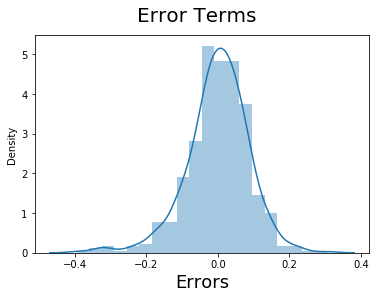

In [185]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_bike), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

##### As you can see the error terms are normally distributed across the mean.

## Step 8: Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final model.

#### Applying the scaling on the test sets

In [186]:
# Apply scaler() to the columns 'temp','hum','windspeed', and 'cnt'.

num_vars = ['temp', 'hum', 'windspeed', 'cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])



In [187]:
# Checking the info of the df_test for the columns

df_test.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   yr               219 non-null    int64  
 1   holiday          219 non-null    int64  
 2   workingday       219 non-null    int64  
 3   temp             219 non-null    float64
 4   hum              219 non-null    float64
 5   windspeed        219 non-null    float64
 6   cnt              219 non-null    float64
 7   Spring           219 non-null    uint8  
 8   Summer           219 non-null    uint8  
 9   Winter           219 non-null    uint8  
 10  Aug              219 non-null    uint8  
 11  Dec              219 non-null    uint8  
 12  Feb              219 non-null    uint8  
 13  Jan              219 non-null    uint8  
 14  Jul              219 non-null    uint8  
 15  Jun              219 non-null    uint8  
 16  Mar              219 non-null    uint8  
 17  May            

#### Dividing into X_test and y_test

In [188]:
# Assigning the "cnt" to y_test and the rest of the columns in the df_test data frame to X_test.

y_test = df_test.pop('cnt')


X_test = df_test



In [189]:
# Checking the cnt values in the y_test

y_test


184    0.692706
535    0.712034
299    0.303382
221    0.547400
152    0.569029
         ...   
400    0.336516
702    0.757478
127    0.495973
640    0.868615
72     0.232858
Name: cnt, Length: 219, dtype: float64

In [190]:
# Checking the columns in the X_test data frame.

X_test.columns


Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'Spring',
       'Summer', 'Winter', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar',
       'May', 'Nov', 'Oct', 'Sep', 'Monday', 'Saturday', 'Sunday', 'Thursday',
       'Tuesday', 'Wednesday', 'Cloudy', 'Light Snow Rain'],
      dtype='object')

In [191]:
# Checking the info of the X_test data frame.

X_test.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 28 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   yr               219 non-null    int64  
 1   holiday          219 non-null    int64  
 2   workingday       219 non-null    int64  
 3   temp             219 non-null    float64
 4   hum              219 non-null    float64
 5   windspeed        219 non-null    float64
 6   Spring           219 non-null    uint8  
 7   Summer           219 non-null    uint8  
 8   Winter           219 non-null    uint8  
 9   Aug              219 non-null    uint8  
 10  Dec              219 non-null    uint8  
 11  Feb              219 non-null    uint8  
 12  Jan              219 non-null    uint8  
 13  Jul              219 non-null    uint8  
 14  Jun              219 non-null    uint8  
 15  Mar              219 non-null    uint8  
 16  May              219 non-null    uint8  
 17  Nov            

In [192]:
# Adding constant variable to test dataframe

X_test_new = sm.add_constant(X_test)


In [193]:
# Verifying the columns of the X_test_new data frame.

X_test_new.columns


Index(['const', 'yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'Spring', 'Summer', 'Winter', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun',
       'Mar', 'May', 'Nov', 'Oct', 'Sep', 'Monday', 'Saturday', 'Sunday',
       'Thursday', 'Tuesday', 'Wednesday', 'Cloudy', 'Light Snow Rain'],
      dtype='object')

In [194]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from the old X_test_new

X_test_new = X_test_new[X_train_new.columns]



In [195]:
# Verifying the columns of the X_test_new data frame.

X_test_new.columns


Index(['const', 'yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'Summer', 'Winter', 'Jan', 'Jul', 'Sep', 'Saturday', 'Cloudy',
       'Light Snow Rain'],
      dtype='object')

In [196]:
# Making predictions

y_pred = lm.predict(X_test_new)


## Step 9: Model Evaluation

Text(0, 0.5, 'y_pred')

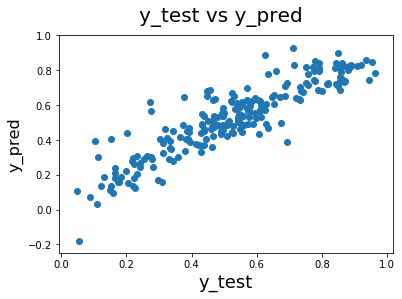

In [197]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

- As you can see we have obtained a linear model for the y_test and y_pred.


##### Calculating the final R-Squared value for the test data.

In [198]:
# Calculating the R-Squared for the test data.

from sklearn.metrics import r2_score

r2_score(y_test, y_pred)



0.8045864770086913

### <font color = green > The R-Squared value for the test data is 80.45 %, and it is with in the given cutoff of 78 to 85 percentage. </font>



We can see that the equation of our best fitted line is:

$ cnt = 0.2003 + 0.2294  \times  yr - 0.0600  \times  holiday + 0.0439 \times workingday +0.5677 \times temp - 0.1643 \times hum - 0.1932 \times windspeed + 0.0746 \times Summer + 0.1266 \times Winter - 0.0392  \times  Jan
- 0.0445  \times  Jul + 0.0926 \times Sep + 0.0540 \times Saturday - 0.0556 \times Cloudy - 0.2446 \times Light Snow Rain $

### <font color = green > Insights : </font>

- 1. Holiday, Humidity, Windspeed, Cloudy Weather,Light Snow Rain, and the months of January & July have a negative impact on the final count.
- 2. Year,WorkingDay, Temperature, Summer, Winter, Saturday, and the September month have a positive impact on the final count.
